<a href="https://colab.research.google.com/github/Mjcherono/autolibdatasetweek4IP/blob/main/Copy_of_Mercy_Cheruiyot_Data_Science_CoreProgram_IPWeek4_MoringaSchool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem Statement.
######Autolib dataset describes data from an electric car sharing service company. It gives information on three types of cars; Blue cars, Utilib and Utilib 14, when the cars are taken and returned also free and occupied slots.
######As analyst I will be trying to find out which day of the week has the most number of  bblue cars taken. And confirm the claim that Sunday is the day of the week when most bluecars are taken and not monday.


###Objectives


1.   Do data preprocessing on the data.
2.   Univariate and bivariate analysis.
3.   Implement soution



####Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####Loading the Autolib dataset

In [4]:
dataset = pd.read_csv('/content/autolib_daily_events_postal_code.csv')

####Dataset Review

In [5]:
#checking on head
dataset.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
#checking on the tail
dataset.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
#checking on rows and columns
dataset.shape

(16085, 13)

In [8]:
#dataset summary
dataset.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [9]:
#checking for data types
dataset.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [10]:
#checking on columns
dataset.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [11]:
#changing some column names
dataset.columns =['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type',
       'blueCars_taken_sum', 'blueCars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']
dataset.columns

Index(['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type',
       'blueCars_taken_sum', 'blueCars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [12]:
#checking for number of unique values
dataset.nunique()

postal_code               104
date                      156
daily_data_points          23
day_of_week                 7
day_type                    2
blueCars_taken_sum        932
blueCars_returned_sum     929
utilib_taken_sum           48
utilib_returned_sum        49
utilib_14_taken_sum        92
utilib_14_returned_sum     94
slots_freed_sum           297
slots_taken_sum           301
dtype: int64

In [13]:
#checking for unique values in the day of the week column
dataset['day_of_week'].unique()

array([0, 1, 2, 3, 4, 5, 6])

###Data Preprocessing

In [14]:
#checking for null values
dataset.isnull().sum()

postal_code               0
date                      0
daily_data_points         0
day_of_week               0
day_type                  0
blueCars_taken_sum        0
blueCars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [15]:
#checking for duplicates
dataset.duplicated().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


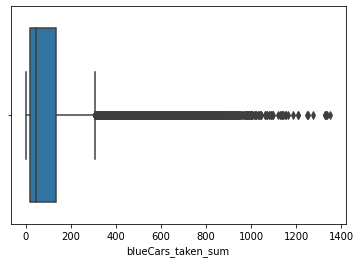

In [18]:
#checking for outliers in the blue cars taken
sns.boxplot(dataset['blueCars_taken_sum'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


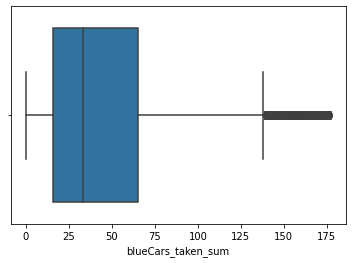

In [22]:
#Doing away with the outliers
q1, q3 = np.percentile(dataset['blueCars_taken_sum'], [25, 75]) 
iqr = q3 - q1

upper_bound = q3 + (1.5 * iqr)
dataset = dataset[~(dataset['blueCars_taken_sum']>upper_bound)]
sns.boxplot(dataset['blueCars_taken_sum'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


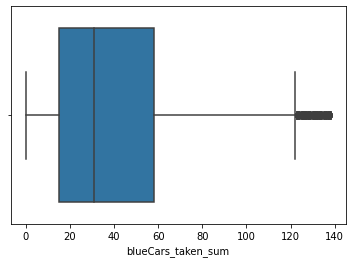

In [23]:
q1, q3 = np.percentile(dataset['blueCars_taken_sum'], [25, 75]) 
iqr = q3 - q1

upper_bound = q3 + (1.5 * iqr)
dataset = dataset[~(dataset['blueCars_taken_sum']>upper_bound)]
sns.boxplot(dataset['blueCars_taken_sum'])

###Exploratory Data Analysis

####Univariate Analysis.

In [377]:
dataset.columns

Index(['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type',
       'blueCars_taken_sum', 'blueCars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [24]:
#Getting our focus columns
df = dataset[['day_of_week','blueCars_taken_sum']]
df

,day_of_week,blueCars_taken_sum
0,0,110
1,1,98
2,2,138
3,3,104
4,4,114
...,...,...
16080,4,15
16081,5,19
16082,6,33
16083,0,11


In [25]:
#Changing the days of the week from numerical representations to actual days
df["day_of_week"].replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Sartuday", 6: "Sunday"}, inplace=True)
df

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,day_of_week,blueCars_taken_sum
0,Monday,110
1,Tuesday,98
2,Wednesday,138
3,Thursday,104
4,Friday,114
...,...,...
16080,Friday,15
16081,Sartuday,19
16082,Sunday,33
16083,Monday,11


In [36]:
#getting the total sum of blue cars taken each day
bluecar_sum = df.groupby(['day_of_week'])['blueCars_taken_sum'].agg('sum').reset_index()
bluecar_sum.sort_values('blueCars_taken_sum')
bluecar_sum

,day_of_week,blueCars_taken_sum
0,Friday,69389
1,Monday,70093
2,Sartuday,74380
3,Sunday,78908
4,Thursday,66520
5,Tuesday,67423
6,Wednesday,65746


In [37]:
df4 = df.copy()

In [38]:
#Getting the mean of blue cars taken 
bluecar_sum['blueCars_taken_sum'].mean()

70351.28571428571

In [39]:
#Median
bluecar_sum['blueCars_taken_sum'].median()

69389.0

In [40]:
#Mode
bluecar_sum['blueCars_taken_sum'].mode()

0    65746
1    66520
2    67423
3    69389
4    70093
5    74380
6    78908
dtype: int64

In [41]:
#Getting std
bluecar_sum['blueCars_taken_sum'].std()

4741.709737857774

In [42]:
#Variance
bluecar_sum['blueCars_taken_sum'].var()

22483811.23809524

In [43]:

#skewness
bluecar_sum['blueCars_taken_sum'].skew()

1.1204895833723214

In [44]:
#Kurtosis
bluecar_sum['blueCars_taken_sum'].kurt()

0.47473879174917233

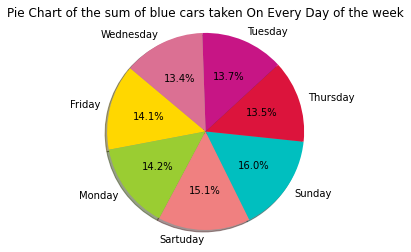

In [51]:
#Pie chart of the sum of blue taken cars 
df2 = bluecar_sum['blueCars_taken_sum']
labels = bluecar_sum['day_of_week'] 
colors = ['gold', 'yellowgreen', 'lightcoral','c','crimson','mediumvioletred','palevioletred']


plt.pie(df2, labels = labels,colors=colors, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of the sum of blue cars taken On Every Day of the week')
plt.show()

#####From the above pie chart we see that;
*   Sunday takes the lead for the days when most  blue cars are returned
*   It has a high record of 16.0%
*   Sartuday follows closely with a record of 15.1%




Text(0, 0.5, 'sum of utilib 14')

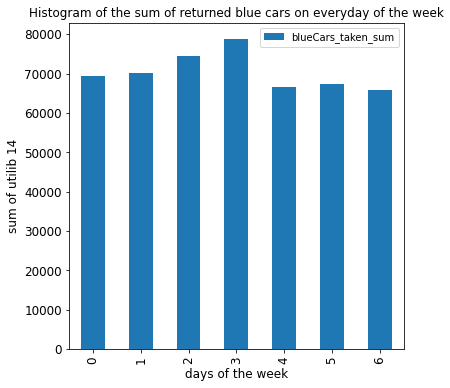

In [52]:
#Histogram of blue  cars on everyday of the week

df3 = bluecar_sum.plot(kind='bar', title ="Histogram of the sum of returned blue cars on everyday of the week",figsize=(6,6),legend=True, fontsize=12)
df3.set_xlabel("days of the week",fontsize=12)
df3.set_ylabel("sum of utilib 14",fontsize=12)

###Bivariate Analysis


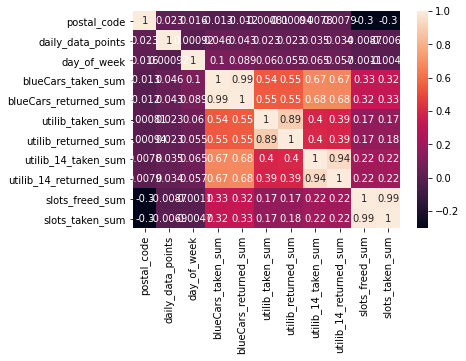

In [53]:
#Checking on data correlation using a heatmap
sns.heatmap(dataset.corr(),annot=True)
plt.show()

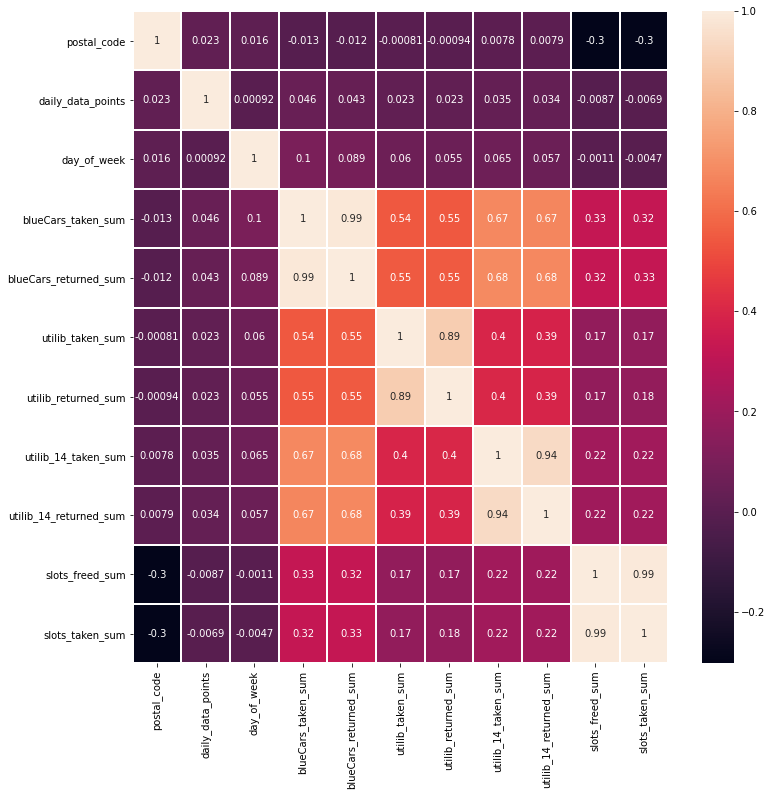

In [54]:
corrMatrix = dataset.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True, linewidths=1)
plt.show()

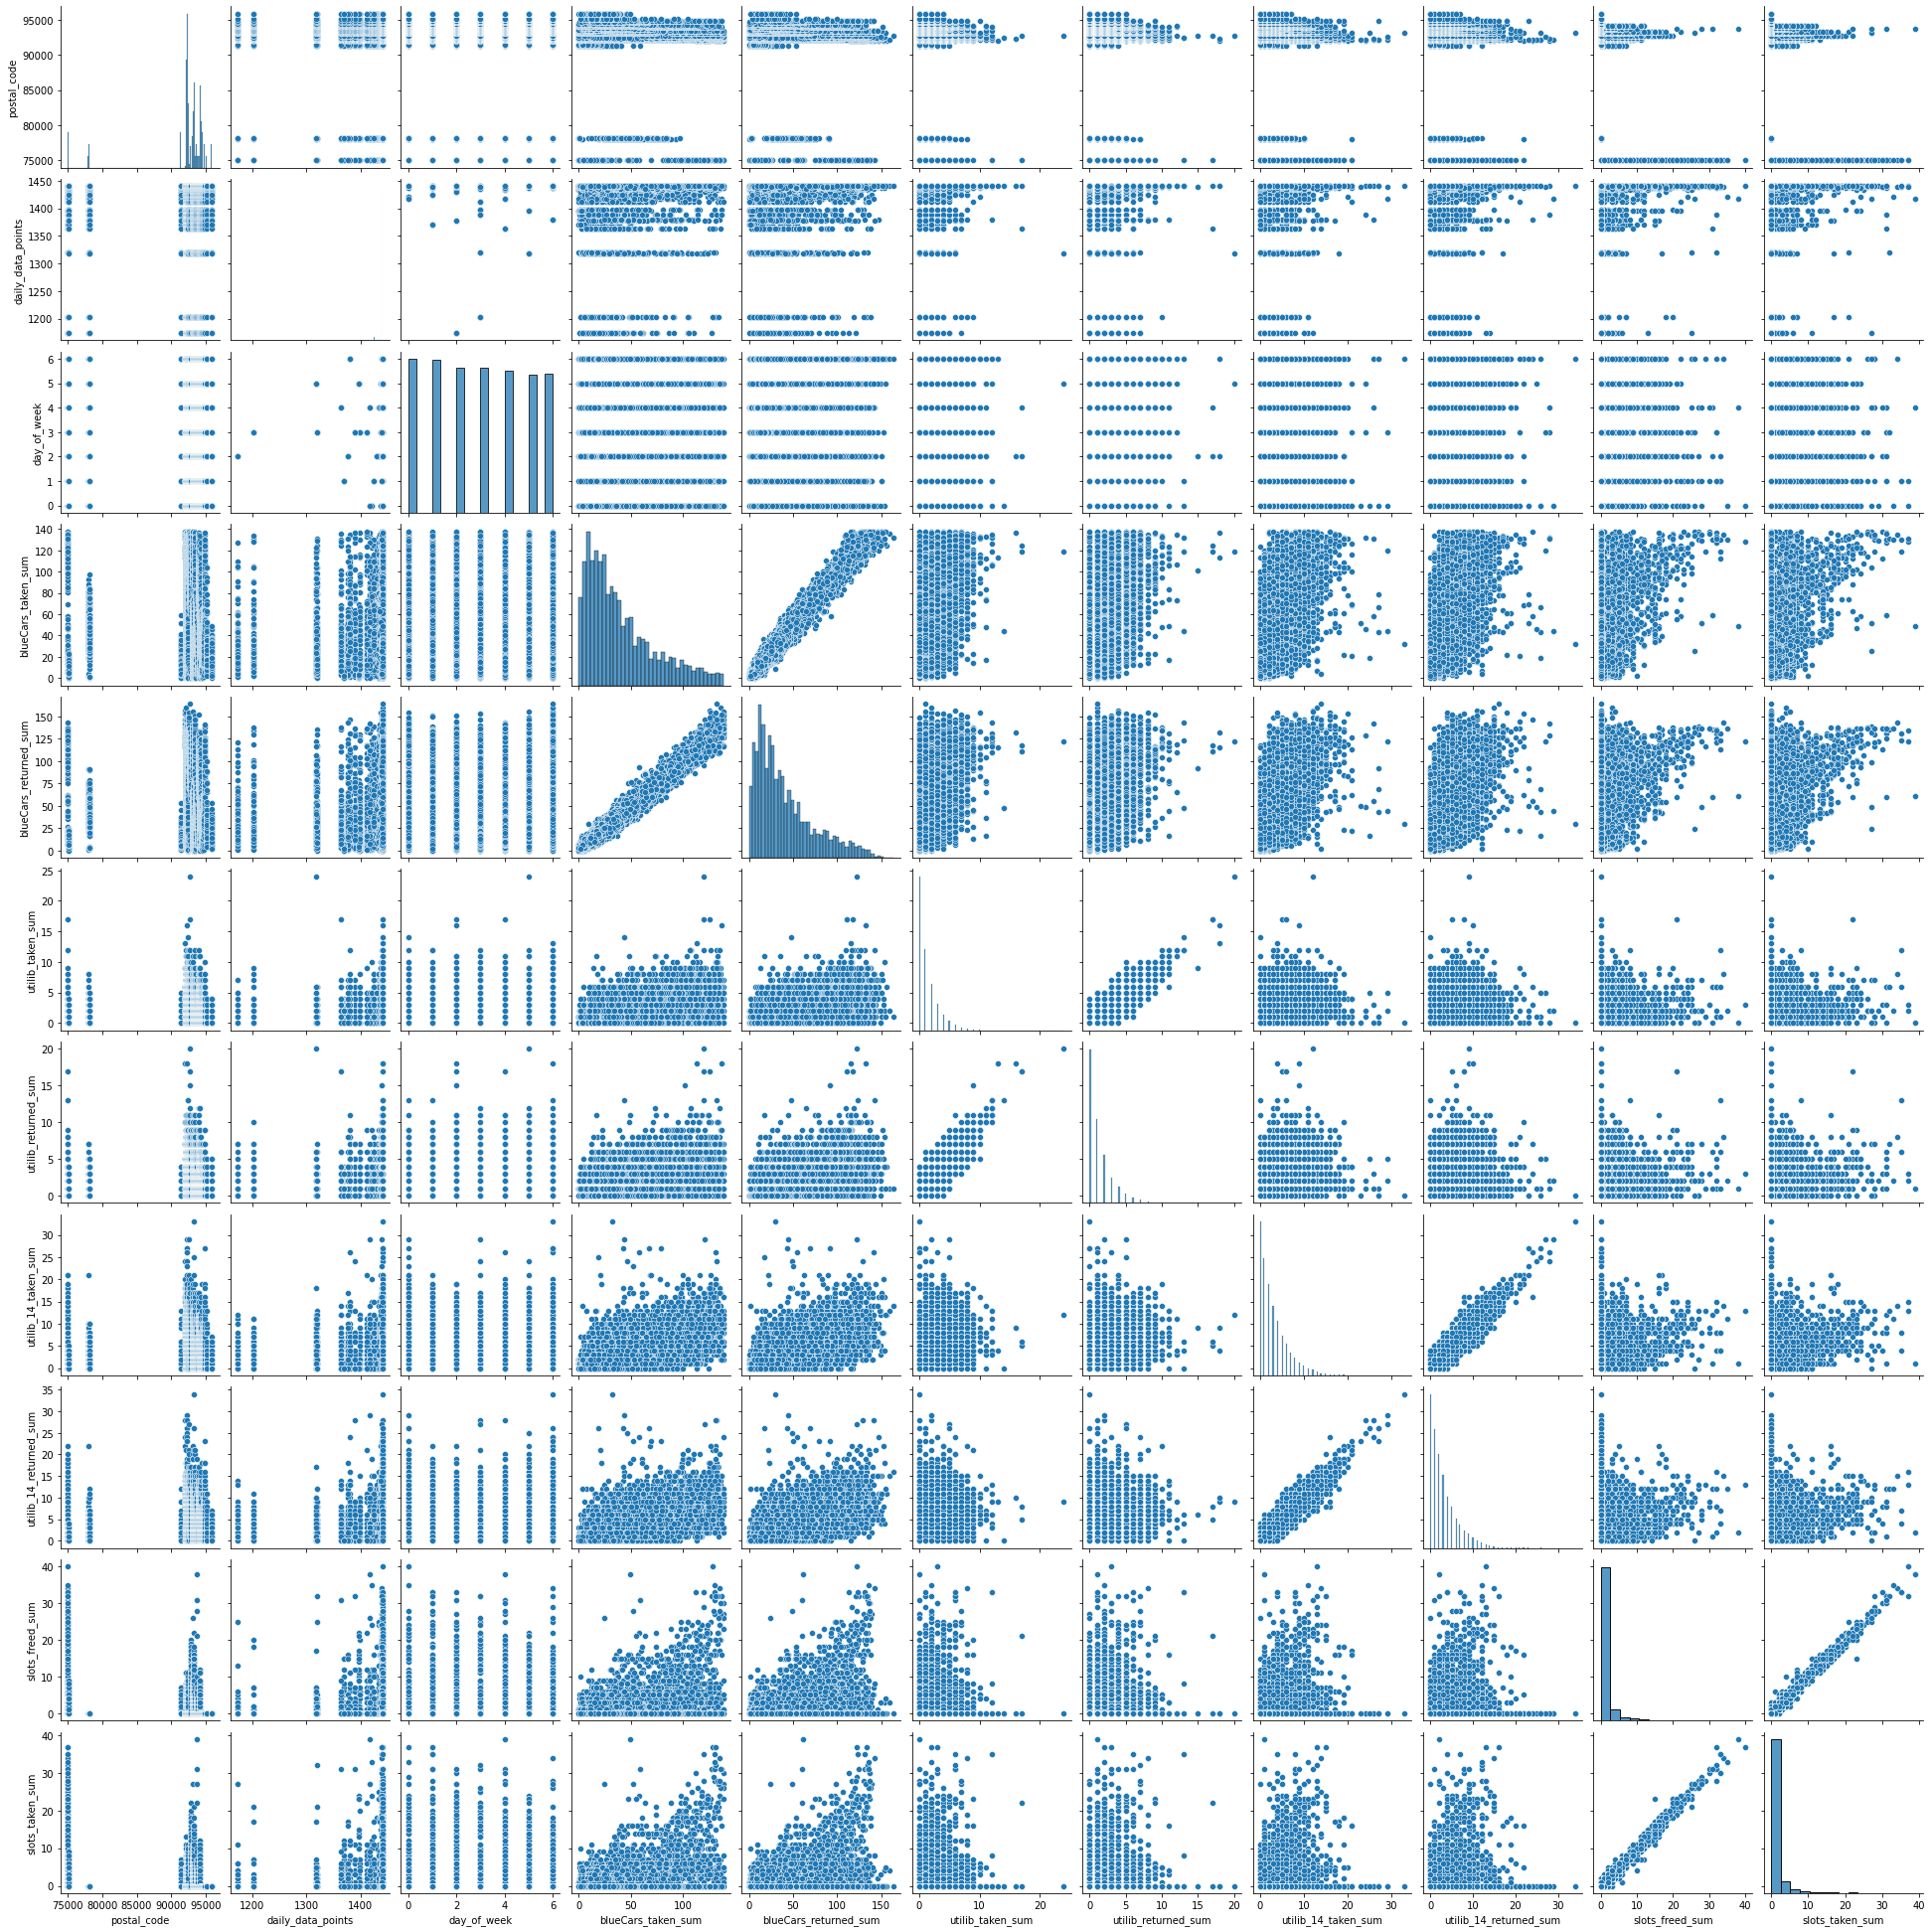

In [55]:
#Plotting bivariate summaries
sns.pairplot(dataset)
plt.show()

In [56]:
dataset.columns

Index(['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type',
       'blueCars_taken_sum', 'blueCars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

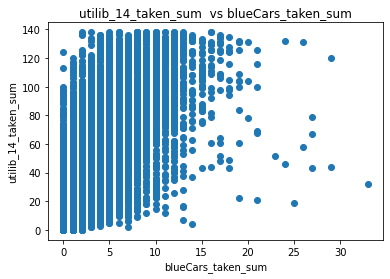

In [57]:
#scatter plot that shows distribtion of Utilib 14 cars taken and bluecars take

plt.scatter(dataset['utilib_14_taken_sum'], dataset['blueCars_taken_sum'])
plt.title('utilib_14_taken_sum  vs blueCars_taken_sum')
plt.xlabel('blueCars_taken_sum')
plt.ylabel('utilib_14_taken_sum')
plt.show()

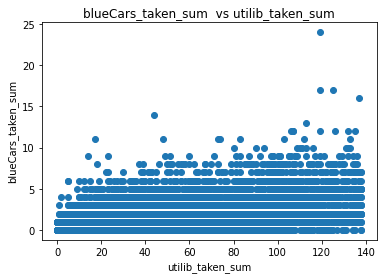

In [58]:
#scatter plot that shows distribtion of blue cars taken and utilib taken

plt.scatter(dataset['blueCars_taken_sum'], dataset['utilib_taken_sum'])
plt.title('blueCars_taken_sum  vs utilib_taken_sum')
plt.xlabel('utilib_taken_sum')
plt.ylabel('blueCars_taken_sum')
plt.show()

###Hypothesis Testing

#####H0: The sum of the  number of times blue cars is taken on Sunday is more than the number it's taken on Monday
#####H1: The sum of the number of times blue cars is taken on Sunday is less than the number it's taken on Monday 

###Test Statistics

In [59]:
bluecar_sum

,day_of_week,blueCars_taken_sum
0,Friday,69389
1,Monday,70093
2,Sartuday,74380
3,Sunday,78908
4,Thursday,66520
5,Tuesday,67423
6,Wednesday,65746


In [60]:
#Mean, Count and standard deviation of the data.
df = df.groupby(['day_of_week'])['blueCars_taken_sum'].agg(['mean', 'std'])
df

,mean,std
day_of_week,,
Friday,40.817059,32.235724
Monday,38.218648,31.920073
Sartuday,45.243309,34.836988
Sunday,47.363745,33.545680
Thursday,38.495370,32.225483
Tuesday,36.823048,31.744099
Wednesday,38.091541,31.435192


In [61]:
#Getting the Sunday values
bluecars_sunday = df4[df4.day_of_week == "Sunday"]
bluecars_sunday

,day_of_week,blueCars_taken_sum
94,Sunday,119
125,Sunday,114
278,Sunday,135
281,Sunday,133
3126,Sunday,11
...,...,...
16054,Sunday,30
16061,Sunday,37
16068,Sunday,36
16075,Sunday,34


In [62]:
#Selecting random sample of blue cars taken on Sunday
np.random.seed(500)
bluecars_sunday_sample= bluecars_sunday.sample(n = 600, replace="False")
bluecars_sunday_sample.head(10)

,day_of_week,blueCars_taken_sum
10320,Sunday,31
10976,Sunday,21
5537,Sunday,43
11014,Sunday,16
5633,Sunday,67
7877,Sunday,45
15162,Sunday,47
10231,Sunday,37
9059,Sunday,23
5537,Sunday,43


In [64]:
#Getting the monday values
bluecar_monday = df4[df4.day_of_week == "Monday"]
bluecar_monday

,day_of_week,blueCars_taken_sum
0,Monday,110
7,Monday,84
14,Monday,107
21,Monday,123
28,Monday,83
...,...,...
16055,Monday,26
16062,Monday,4
16069,Monday,10
16076,Monday,17


In [65]:
#Selecting random sample of blue cars taken on Sunday
np.random.seed(500)
bluecars_monday_sample= bluecar_monday.sample(n = 600, replace="False")
bluecars_monday_sample.head(10)

,day_of_week,blueCars_taken_sum
9371,Monday,98
10093,Monday,138
5219,Monday,66
15461,Monday,112
10130,Monday,21
5329,Monday,130
7513,Monday,46
14058,Monday,62
9282,Monday,10
8632,Monday,19


In [66]:
n1 = bluecars_sunday_sample.shape[0]
n1

600

In [67]:
n2 = bluecars_monday_sample.shape[0]
n2

600

In [69]:
#test statistics
Assumed_mean=45.24
mean=47.36
std1=33.54
std2=31.92

import math

z_statistic = ((Assumed_mean - mean)/math.sqrt((std1/n1) + (std2/n2)))
z_statistic

-6.418351324952722

In [70]:
#Calculating the p value
import scipy.stats as stats

p_value = stats.norm.cdf(z_statistic)
p_value

6.887902550612391e-11

#####P valu(6.887902550612391e-11) which is less than 0.05 hence we reject the null hypothesis
#####Conclusion: There is enough evidence to **reject** the null hypothesis .

###Point Estimation

In [71]:
import scipy.stats as stats
import random

In [72]:
#calculating the population mean
pop_bluecars = dataset['blueCars_taken_sum'].mean()
pop_bluecars

40.60178085580015